<a href="https://colab.research.google.com/github/JainAnvitha/AnvithJain-Colab/blob/master/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from scipy.spatial.distance import cdist
import pylab as pl

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
crime = pd.read_csv('drive/My Drive/crimeData.csv')
crime.head()


,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,1/29/16 0:00,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.200000e+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,4/25/16 0:00,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.410000e+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/16 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.600000e+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/16 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.600000e+13


In [0]:
# describing the data

crime.describe()

,IncidntNum,X,Y,PdId
count,1.505000e+05,150500.000000,150500.000000,1.505000e+05
mean,1.616440e+08,-122.423599,37.768921,1.616152e+13
std,5.535976e+06,0.026210,0.023637,5.523506e+11
min,1.135121e+07,-122.513642,37.707922,1.140000e+12
25%,1.603283e+08,-122.434036,37.756486,1.600000e+13
50%,1.606541e+08,-122.416903,37.775421,1.610000e+13
75%,1.609764e+08,-122.406605,37.785063,1.610000e+13
max,9.910090e+08,-122.365565,37.819975,9.910000e+13


**Preprocessing the data**

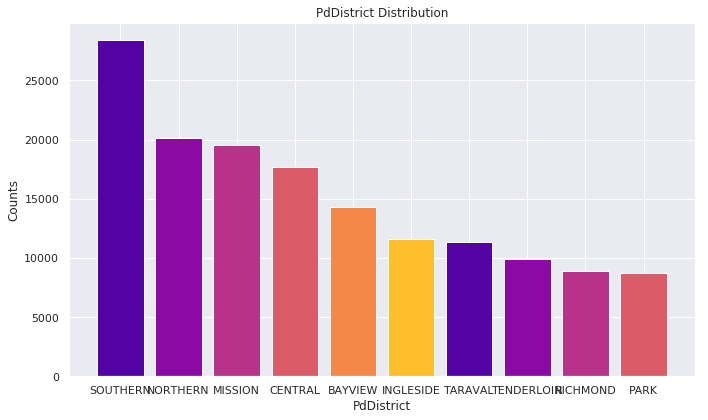

In [0]:
plt.figure(figsize=(10,6))
plt.bar(crime['PdDistrict'].value_counts().index, 
        crime['PdDistrict'].value_counts(),
        color=sns.color_palette('plasma'))
plt.xlabel('PdDistrict')
plt.ylabel('Counts')
plt.title('PdDistrict Distribution')
plt.tight_layout()

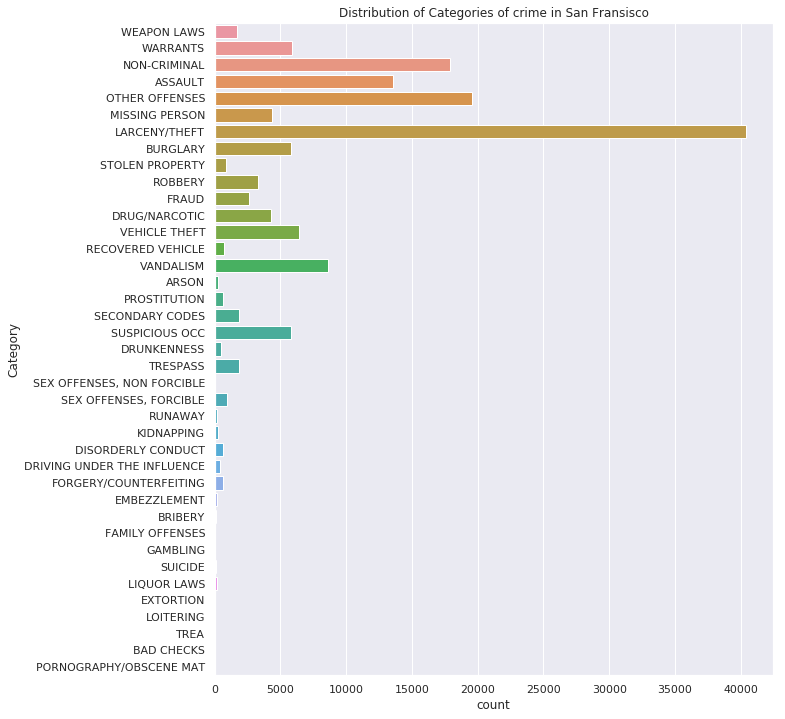

In [0]:
plt.figure(figsize=(10,12))
plt.title('Distribution of Categories of crime in San Fransisco')
sns.countplot(y=crime['Category'])

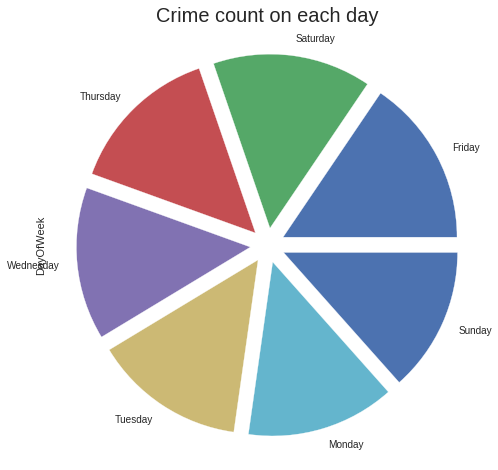

In [0]:
# Regions with count of crimes

plt.style.use('seaborn')


crime['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()


Checking data set for null values

In [0]:
def null_check(df,name):
    print(name)
    print('Number of rows and cols are {} and {}'.format(df.shape[0],
            df.shape[1]))
    print('Number of nulls are \n{}'.format(df.isnull().sum()),'\n')
    

null_check(crime,'crimeData')


crimeData
Number of rows and cols are 150500 and 13
Number of nulls are 
IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64 



checking for data that is missing

In [0]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [0]:
missing_data(crime)

,Total,Percent
PdDistrict,1,0.000664
PdId,0,0.000000
Location,0,0.000000
Y,0,0.000000
X,0,0.000000
Address,0,0.000000
Resolution,0,0.000000
Time,0,0.000000
Date,0,0.000000
DayOfWeek,0,0.000000


In [0]:
# filling the missing value in PdDistrict using the mode values

crime['PdDistrict'].fillna(crime['PdDistrict'].mode()[0], inplace = True)

crime.isnull().any().any()

False

Convert categories to numberes values to avoid conversion


In [0]:
crime['Category'].value_counts().head(n = 39)


LARCENY/THEFT                  40409
OTHER OFFENSES                 19599
NON-CRIMINAL                   17866
ASSAULT                        13577
VANDALISM                       8589
VEHICLE THEFT                   6419
WARRANTS                        5914
BURGLARY                        5802
SUSPICIOUS OCC                  5782
MISSING PERSON                  4338
DRUG/NARCOTIC                   4243
ROBBERY                         3299
FRAUD                           2635
SECONDARY CODES                 1841
TRESPASS                        1812
WEAPON LAWS                     1658
SEX OFFENSES, FORCIBLE           940
STOLEN PROPERTY                  882
RECOVERED VEHICLE                736
DISORDERLY CONDUCT               658
PROSTITUTION                     641
FORGERY/COUNTERFEITING           619
DRUNKENNESS                      465
DRIVING UNDER THE INFLUENCE      378
ARSON                            286
KIDNAPPING                       257
EMBEZZLEMENT                     168
L

In [0]:
# Cat = crime['Category'].unique().tolist()
# mapping = dict( zip(Cat,range(len(Cat))) )
# print(Cat)
# print(mapping)
# crime.replace({'Cat': mapping},inplace=True)
# # crime.Category.map(mapping)
# Cat = []
# for row in crime['Category']:
#     try:
#         Cat.append(mapping[row])
#     except:
#         Cat.append(np.NaN)
# crime['Category'] = Cat
# print(crime['Category'])

In [0]:
crime['Category']= crime['Category'].map({'LARCENY/THEFT ':0,'OTHER OFFENSES':1,'NON-CRIMINAL  ':2,'ASSAULT ':3,'VANDALISM ':4,'VEHICLE THEFT ':5,
                                          'WARRANTS ':6,'BURGLARY  ':7,'SUSPICIOUS OCC ':8,'MISSING PERSON ':9,'DRUG/NARCOTIC  ':10,
                                          'ROBBERY ':11,'FRAUD ':12,'SECONDARY CODES ':13,'TRESPASS ':14,'WEAPON LAWS ':15,'SEX OFFENSES, FORCIBLE ':16,
                                          'STOLEN PROPERTY ':17,'RECOVERED VEHICLE ':18,'DISORDERLY CONDUCT':19,'PROSTITUTION ':20,'FORGERY/COUNTERFEITING ':21,'DRUNKENNESS ':22,
                                          'DRIVING UNDER THE INFLUENCE ':23,'ARSON ':24,'KIDNAPPING ':25,'EMBEZZLEMENT ':26,'LIQUOR LAWS ':27,'RUNAWAY ':28,
                                          'SUICIDE ':29,'BRIBERY ':30,'EXTORTION ':31,'FAMILY OFFENSES ':32,'LOITERING ':33,'SEX OFFENSES, NON FORCIBLE ':34,
                                          'BAD CHECKS ':35,'GAMBLING ':36,'PORNOGRAPHY/OBSCENE MAT ':37,'LTREA ':38})

In [0]:
crime['DayOfWeek'].value_counts().head(n = 10)

Friday       23371
Saturday     22172
Thursday     21395
Wednesday    21332
Tuesday      21242
Monday       20783
Sunday       20205
Name: DayOfWeek, dtype: int64

In [0]:
crime['DayOfWeek']= crime['DayOfWeek'].map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

location value is in string - it has to be converted to float.

In [0]:
lat = []
lon = []
for row in crime['Location']:
    try:
        lat.append(row.split(',')[0].strip('('))
        lon.append(row.split(',')[1].strip(')'))
    except:
        lat.append(np.NaN)
        lon.append(np.NaN)
crime['X'] = lat
crime['Y'] = lon

In [0]:
# # X = crime.iloc[:, :9].values
# # Handling the missing values 
# X.fillna(method ='ffill', inplace = True) 
  
# print(X.head()) 

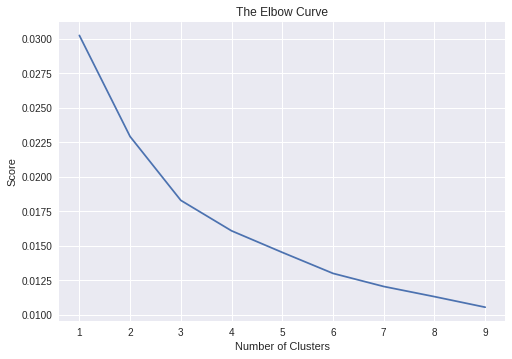

In [0]:
lat_x=np.array(crime['X'].values) 
long_y=np.array(crime['Y'].values)
# Elbow method to caculte k
# Euclidean distance metric is used.
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
crime_data = np.array(list(zip(lat_x, long_y)))

inertia = []
distortion = []
map1 = {}
map2 = {}

Krange = range(1, 10) # define number of clusters range, can't be 0 because there is no 0 clustering
for i in Krange:
  # build, fit the model
  kmeanModel = KMeans(n_clusters=i).fit(crime_data)
  kmeanModel.fit(crime_data)
  
  distortion.append(sum(np.min(cdist(crime_data, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / crime_data.shape[0]) 
  inertia.append(kmeanModel.inertia_) 
  
  map1[i] = sum(np.min(cdist(crime_data, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / crime_data.shape[0] 
  map2[i] = kmeanModel.inertia_
  
  
plt.plot(Krange, distortion, 'bx-') 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('The Elbow Curve') 
plt.show() 
# as the result, the number of clusters will be 3

In [0]:
import matplotlib.pyplot as plt
plt.scatter(crime_data[:,0],
            crime_data[:,1])
plt.show()

### **GMM**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [0]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(3, random_state=0)
labels = kmeans.fit(crime_data).predict(crime_data)
plt.scatter(crime_data[:, 0], crime_data[:, 1], c=labels, s=40, cmap='viridis');


In [0]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, crime_data, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(crime_data)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(crime_data[:, 0], crime_data[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(crime_data[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

In [0]:
kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, crime_data)

In [0]:
rng = np.random.RandomState(13)
X_stretched = np.dot(crime_data, rng.randn(2, 2))

kmeans = KMeans(n_clusters=3, random_state=0)
plot_kmeans(kmeans, X_stretched)

**Generalizing E–M: Gaussian Mixture Models**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


In [0]:
from sklearn.mixture import GaussianMixture
# from scipy.stats import multivariate_normal as mvn
crime_data = np.array(list(zip(crime['X'], crime['Y'])))
gmm = GaussianMixture(n_components=3).fit(crime_data)
labels = gmm.predict(crime_data)
plt.scatter(crime_data[:, 0], crime_data[:, 1], c=labels, s=40, cmap='viridis');

Error in callback <function flush_figures at 0x7fecba1e6e18> (for post_execute):


KeyboardInterrupt: ignored

In [0]:
probs = gmm.predict_proba(crime_data)
print(probs[:5].round(3))

[[0.994 0.001 0.006]
 [0.994 0.001 0.006]
 [0.    0.001 0.999]
 [0.999 0.001 0.   ]
 [0.959 0.012 0.029]]


In [0]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(crime_data[:, 0], crime_data[:, 1], c=labels, cmap='viridis', s=size);

In [0]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, crime_data, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(crime_data).predict(crime_data)
    if label:
        ax.scatter(crime_data[:, 0], crime_data[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(crime_data[:, 0], crime_data[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

In [0]:
gmm = GaussianMixture(n_components=3, random_state=42)
plot_gmm(gmm, crime_data)

In [0]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

In [0]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [0]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

In [0]:
gmm16 = GaussianMixture(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

In [0]:
Xnew = gmm16.sample(400, random_state=42)
plt.scatter(Xnew[:, 0], Xnew[:, 1]);

In [0]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');